In [144]:
import genops
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

## PCA vs Regression

三者其实是 $f(x,y)$、$f(y|x)$、$f(x|y)$ 的区别：误差函数是垂直于直线、垂直于 x 轴、还是垂直于 y 轴。

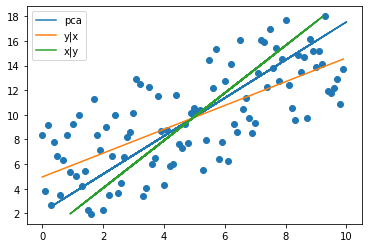

In [123]:
x = genops.arange(100) / 10
eps = genops.rand(100) * 10
y = 1 * x + eps

pca = PCA(1)
xy_pca = pca.fit_transform(np.stack([x, y]).T)
xy_pca = pca.inverse_transform(xy_pca)

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)
y_lr_on_x = lr.predict(x.reshape(-1, 1))

lr = LinearRegression()
lr.fit(y.reshape(-1, 1), x)
x_lr_on_y = lr.predict(y.reshape(-1, 1))

plt.scatter(x, y)
plt.plot(xy_pca[:, 0], xy_pca[:, 1])
plt.plot(x, y_lr_on_x)
plt.plot(x_lr_on_y, y)
plt.legend(['pca', 'y|x', 'x|y'])

## PCA vs Kernel PCA

尝试更改训练集的大小（10，100，1000，10000），会发现：

- 训练集无论大小，PCA 都能重构数据。
- 训练集小的时候，Kernel PCA 无法重构数据，训练集大的时候可以。

这是因为 Kernel PCA 的数据重构是一个与 PCA 本身无关的问题（Pre-image 问题）。

In [154]:
pca = PCA(n_components=3, copy=True)
kpca = KernelPCA(
    n_components=3,
    kernel='rbf',
    gamma=1.0, # default 1/n_features
    kernel_params=None,
    fit_inverse_transform=True,
    eigen_solver='auto',
    tol=0,
    max_iter=None
)
train_set = genops.rand([10000,3])
k_transformed = kpca.fit_transform(train_set)
k_orig =  kpca.inverse_transform(k_transformed)
p_transformed = pca.fit_transform(train_set)
p_orig =  pca.inverse_transform(p_transformed)
print("Original Data")
print(train_set[:5])
print("PCA")
print(p_orig[:5])
print("KPCA")
print(k_orig[:5])

Original Data
tensor([[0.8281, 0.5495, 0.4967],
        [0.9847, 0.4739, 0.1184],
        [0.5065, 0.2784, 0.1347],
        [0.0365, 0.7233, 0.4585],
        [0.9614, 0.9734, 0.1849]])
PCA
[[0.82809073 0.54949641 0.49667591]
 [0.98468137 0.47391587 0.11837012]
 [0.50648993 0.27837795 0.13472074]
 [0.03649676 0.72328931 0.45851731]
 [0.96135783 0.97342855 0.18488395]]
KPCA
[[0.8393512  0.55684817 0.49830708]
 [0.95262766 0.4703348  0.12767673]
 [0.50947785 0.25838447 0.12023804]
 [0.0395561  0.7372758  0.45382008]
 [0.89463407 0.9036159  0.21631905]]
